In [35]:
import numpy as np
import json
from glob import glob as glob
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
from cswNets import *

%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
plt.rcParams['font.size'] = 22

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# from clust

- is difference in learning RNN vs LSTM curves due to difference in number of parameters? plot rnn learning curve for statedim vocab/2, vocab, vocab*2

In [36]:
def read_exp_data(data_file_L):
  """ given list of paths for datafiles, reads data into nparray"""
  acc_L = []
  for fpath in data_file_L:
    acc_arr = np.load(fpath)
    acc_arr = np.squeeze(np.array(acc_arr.item().get('accuracy')))
    acc_L.append(acc_arr)
  return np.array(acc_L)

def get_both_data(dataset_name):
  """ wraper that returns both rnn and lstm data"""
  exp_dir = 'savedmodels/fromclust/exp_' + dataset_name
  RNN_data_file_L = glob(exp_dir+"/RNN*/data_from_train*")
  LSTM_data_file_L = glob(exp_dir+"/LSTM*/data_from_train*")
  rnn_exp_acc = read_exp_data(RNN_data_file_L)
  lstm_exp_acc = read_exp_data(LSTM_data_file_L)
  return rnn_exp_acc,lstm_exp_acc


In [37]:
def mov_avg(X,smooth=15):
  X_L = []
  for i in range(X.shape[1]-smooth):
    x = np.mean(X[:,i:i+smooth,:],1)
    X_L.append(x)
  return np.array(X_L).transpose([1,0,2])

def get_mean_std(acc_arr):
  M = np.mean(acc_arr,0)
  std = np.std(acc_arr,0) / np.sqrt(acc_arr.shape[0])
  return M,std

In [38]:
def plt_subj(ax,acc_arr,c):
  xplt = np.linspace(0,10000,acc_arr.shape[1])
  acc_arr_filler,acc_arr_state = acc_arr[:,:,0],acc_arr[:,:,1]
  for acc_filler,acc_state in zip(acc_arr_filler,acc_arr_state):
    ax.plot(xplt,acc_filler,alpha=0.1,color=c)
    ax.plot(xplt,acc_state,alpha=0.1,color=c,ls='--')
    
def plt_mean_std(ax,mean,std,label,c):
  xplt = np.linspace(0,10000,len(mean))
  mean_state,mean_filler = mean[:,0],mean[:,1]
  std_state,std_filler = std[:,0],std[:,1]
  
  ax.plot(xplt,mean_filler,c=c,label=label+" filler",ls='--',lw=5)
  ax.plot(xplt,mean_state,c=c,label=label+" state",lw=5)
  
  ax.fill_between(xplt,mean_filler-std_filler,
                        mean_filler+std_filler,
                         alpha=0.2,color=c)
  ax.fill_between(xplt,mean_state-std_state,
                        mean_state+std_state,
                         alpha=0.2,color=c)


In [39]:
def net_plt(ax,acc_arr,label,c):
  """ plt single acc arr"""
  acc_arr = mov_avg(acc_arr)
  mean,std = get_mean_std(acc_arr)
  plt_mean_std(ax,mean,std,label,c)
  plt_subj(ax,acc_arr,c)
  # misc
  ax.grid(True)
  ax.set_ylim(0,1.05)
  ax.legend()
  plt.axhline(0.5,c='r',ls='--')
  plt.axhline(0.647,c='r',ls='--')
  plt.axhline(0.8,c='r',ls='--')

def plt_nets(dataset):
  """ wrapper for above:
  plt both networks """
  rnn_acc,lstm_acc = get_both_data(dataset)
  fig,ax = plt.subplots(1,1,figsize=(20,6))
  net_plt(ax,rnn_acc,label='rnn',c='darkcyan')
  net_plt(ax,lstm_acc,label='lstm',c='darkviolet')

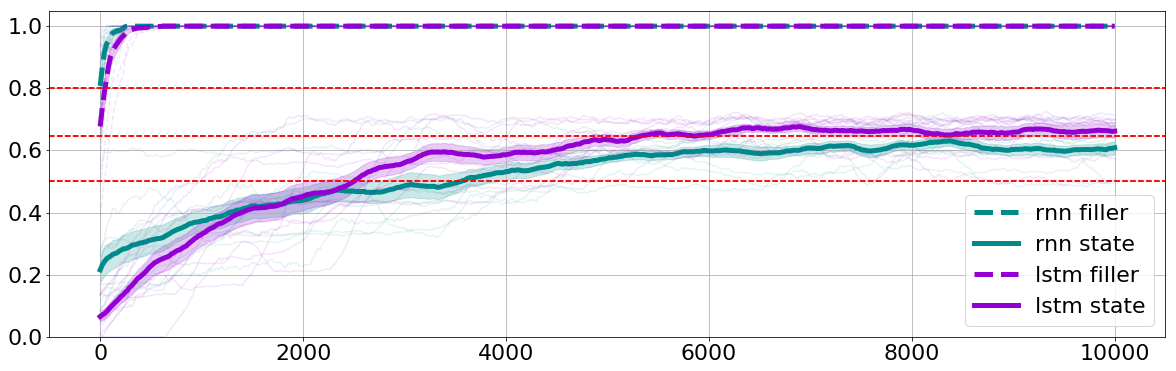

In [40]:
dataset = 'uncond+fix'
plt_nets(dataset)
# plt.savefig('../coglunch talk/'+dataset+'_coglunch.png',format='png')

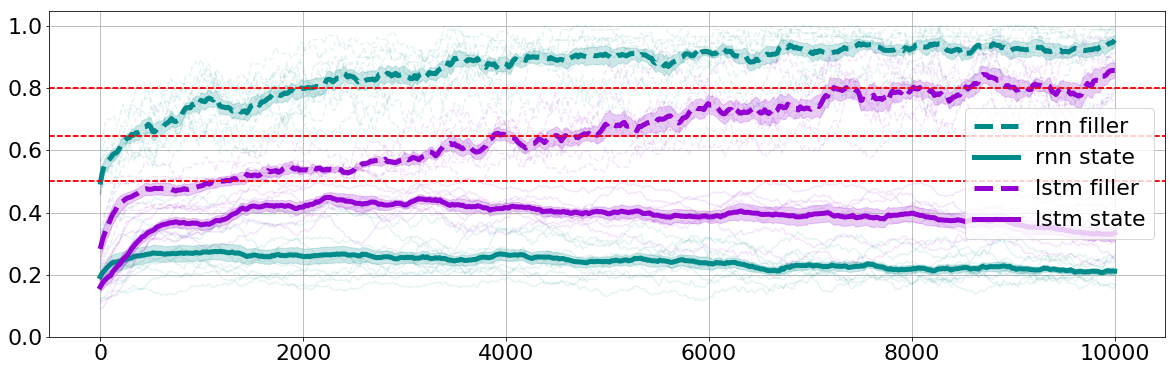

In [41]:
dataset = 'cond+fix'
plt_nets(dataset)
plt.savefig('../coglunch talk/'+dataset+'_coglunch.png',format='png')

IndexError: tuple index out of range

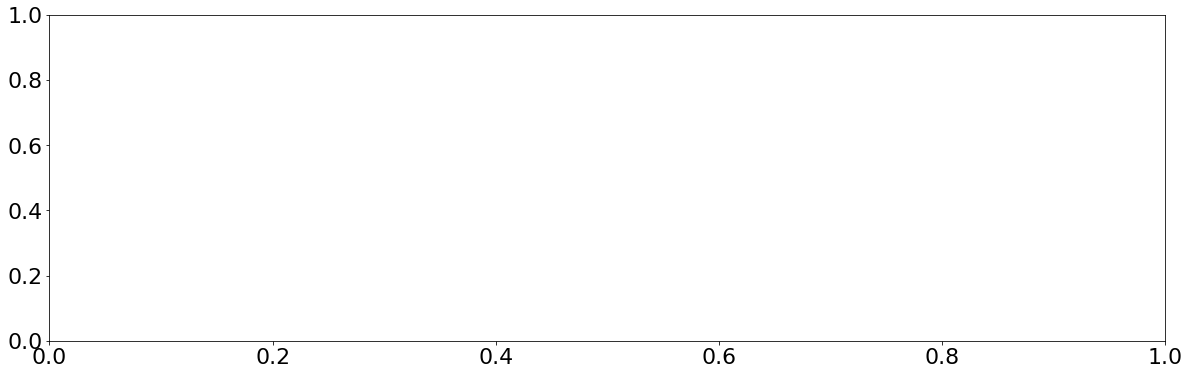

In [16]:
dataset = 'fix+cond'
plt_nets(dataset)
plt.savefig(dataset+'_final.svg',format='svg')

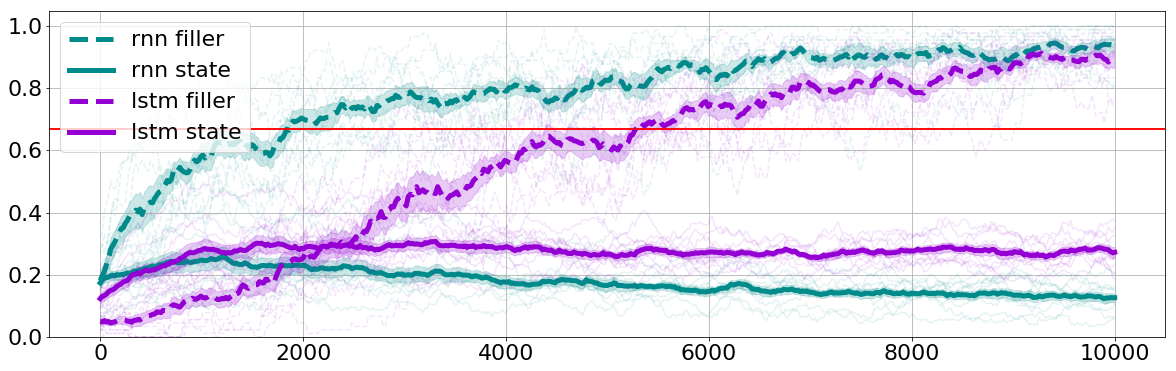

In [179]:
dataset = 'rand+cond'
plt_nets(dataset)
plt.savefig(dataset+'_final.svg',format='svg')

## fix fillers, uncond trans

## rand fillers, uncond trans 

In [ ]:
rnn_acc_ru,lstm_acc_ru = get_both_data('rand+uncond')

plt_nets(rnn_acc_ru,lstm_acc_ru,smooth=15,saving=False)

plt.savefig('rand+uncond.svg',format="svg")

## fix fillers, cond trans

In [ ]:
rnn_acc_fc,lstm_acc_fc = get_both_data('fix+cond')

plt_nets(rnn_acc_fc,lstm_acc_fc,smooth=15,saving=False)

plt.savefig('fix+cond.svg',format="svg")

## cond rand fillers

In [ ]:
rnn_acc_rc,lstm_acc_rc = get_both_data('rand+cond')

plt_nets(rnn_acc_rc,lstm_acc_rc,smooth=15,saving=False)

plt.savefig('rand+cond.svg',format="svg")